# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [98]:
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

[1] 210   6

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

[[1]]
           V1         V2         V3          V4          V5         V6
V1 -0.9886188 -0.9781013 -0.9019465 -1.03530414  0.58627308 -0.6501815
V2 -0.2283528 -0.2662925 -0.3806364 -0.05836485 -1.00338847 -0.7207314
V3  0.4408228  0.5056410  0.5036363  0.41627012  0.16727905  0.5296840
V4  1.4241054  1.4172464  1.4136546  1.30530125 -0.07328373  1.4307335



Warning message in par(opar):
“argument 1 does not name a graphical parameter”
Warning message in par(opar):
“argument 1 does not name a graphical parameter”


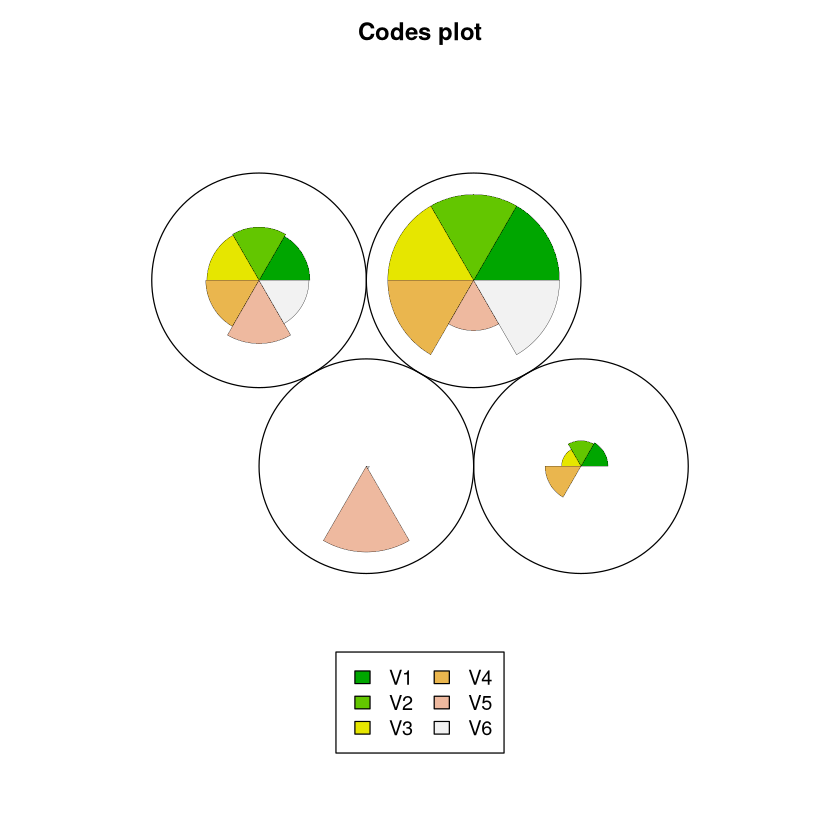

Warning message in par(opar):
“argument 1 does not name a graphical parameter”


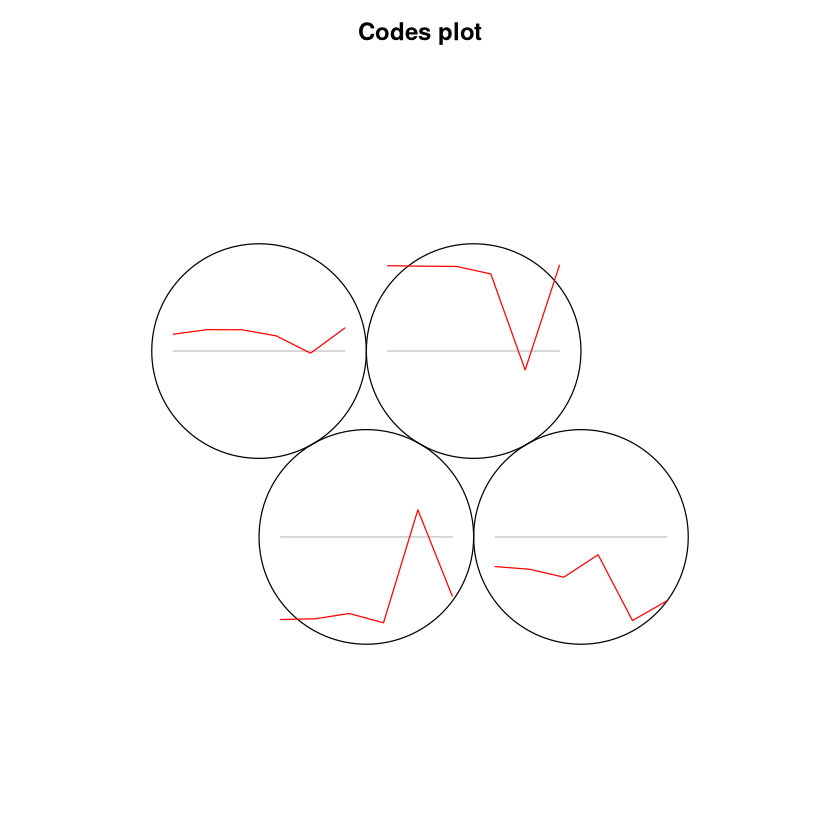

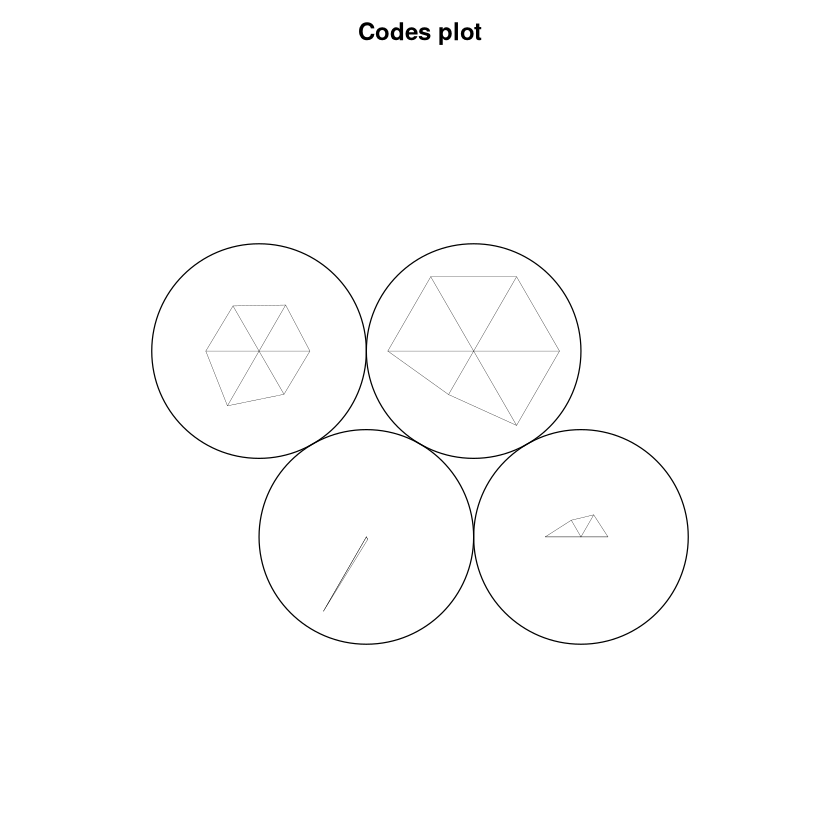

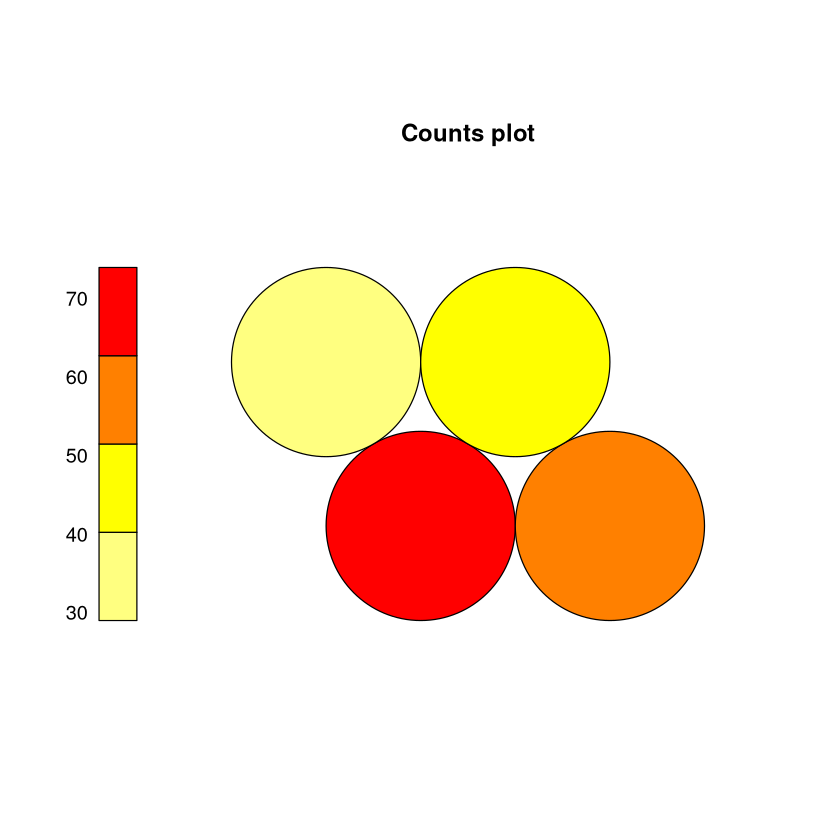

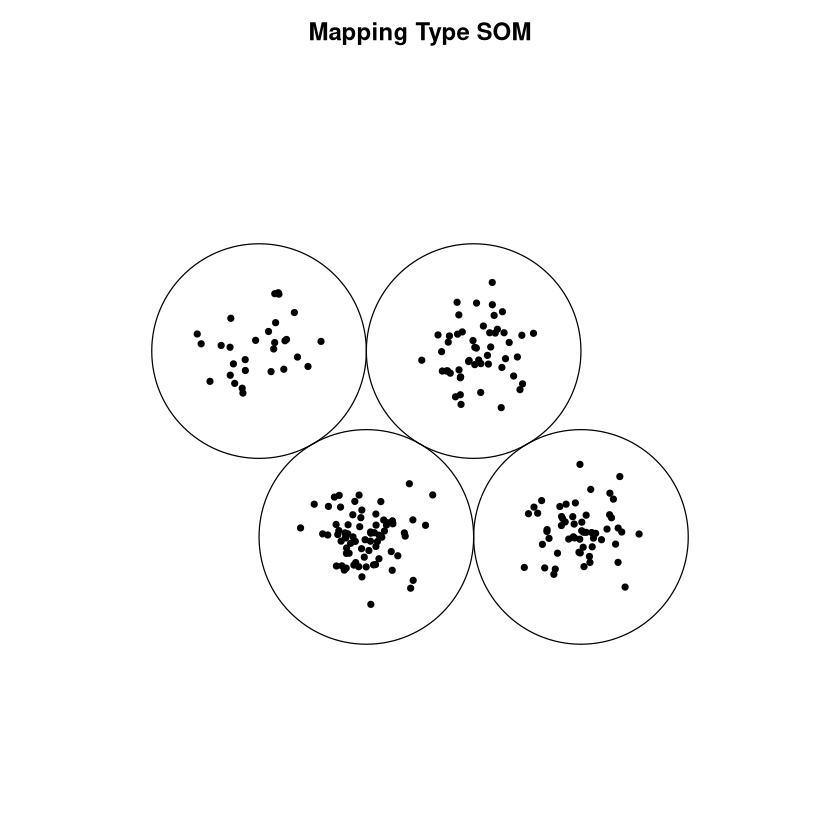

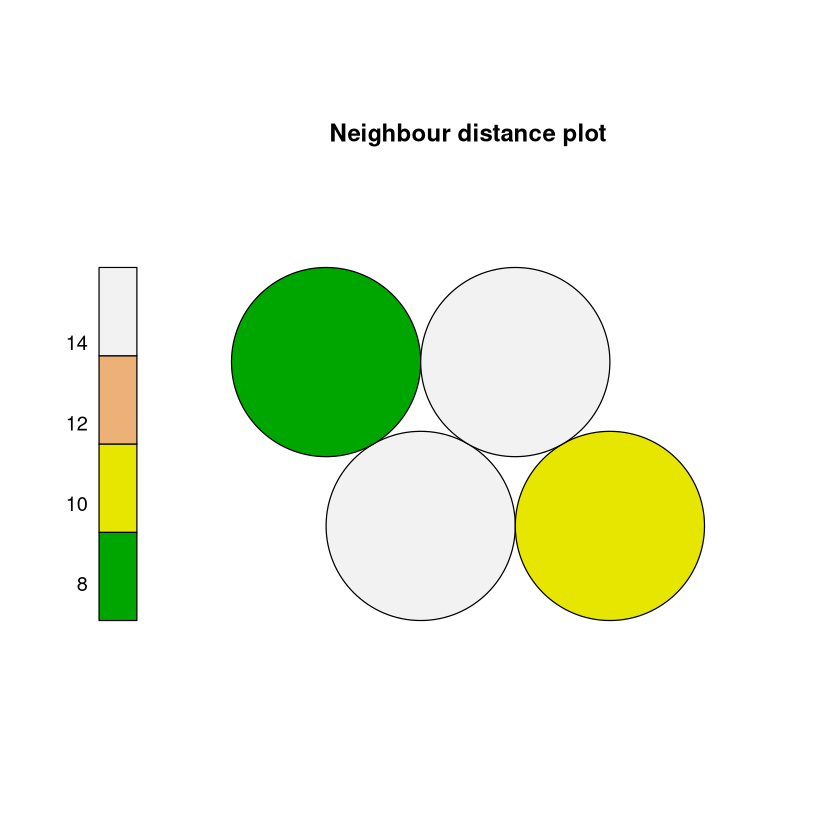

In [99]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))

print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)
plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


**Ejercicio 1:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

<hr>
<h4 style="color:orange"> Desarrollo ejercicio 1.a </h4>

Técnica de aprendizaje no supervisado utilizada para visualizar y analizar datos complejos. Estos mapas se basan en la idea de simular la organización de las neuronas en el cerebro humano.

Entrada:</br>
<li>data: Una matriz, donde cada fila representa un objeto. </li>
<li>grid: Una grilla para los representantes. </li>
<li>rlen: El numero de veces que la data sera expuesta a la red. </li>
<li>alpha: Factor de aprendizaje. Vector de dos numeros indicando el rando de cambio.</li>
<li>radius: El radio del vecindario. Puede ser un numero o un vector (inicio, fin). Si se entrega un solo numero, ira desde el numero hasta su valor negativo.</li>
<li>init: Representantes iniciales, por defecto al azar desde data </li>
<li>toroidal: TRUE: los puentes del mapa estaran unidos. Mapa toroidal hexagonal, el número de filas debe ser par </li>
<li>n.hood: La forma del vecindario, ya sea "circular" o "rectangular" (valor por defecto).</li>
<li>keep.data: Guardar data en el objeto de retorno.</li>

Salida: </br>
<li>data: Un objeto de clase "kohonen" con los componentes </li>
<li>grid: Matriz de datos, (solo se devuelve si keep.data == TRUE) </li>
<li>codes: La cuadrícula, un objeto de clase "somgrid"</li>
<li>changes: Una matriz de vectores de código.</li>
<li>unit.classif: Vector de desviaciones medias medias de los vectores de código. </li>
<li>distances: Unidades ganadoras para todos los objetos de datos, (solo se devuelven si keep.data == TRUE). </li>
<li>toroidal: distancias de los objetos a su unidad ganadora correspondiente, (solo se devuelve si keep.data == TRUE). </li>
<li>method: Si se utiliza un mapa toroidal </li>

Referencia: <a href = "https://www.rdocumentation.org/packages/kohonen/versions/2.0.19/topics/som"> som: Kohonen's self-organising maps - RDocumentation</a>

Los graficos, Codes plot (1, 2, 3), representan lo mismo de diferente forma (graficamente), muestran la representacion de los nodos (4 en total), cada nodo se puede considerar un agrupamiento, los nodos vecinos representan grupos similares mientras que los mas distantes grupos mas diferentes.
El grafico 4 (counts plot), muestra la cantidad de observaciones asignadas a nodo. p.e, el nodo 1 (esquina superior izq), tiene hasta 39 observaciones.
El grafico 5 (mapping type som), muestra la asignacion de cada observacion dentro del nodo.
El grafico 6 (neighbour distance plot), muestra la matriz de distancia entre los datos de un nodo.


<h4 style="color:orange"> Desarrollo ejercicio 1.b </h4>

Warning message in par(opar):
“argument 1 does not name a graphical parameter”


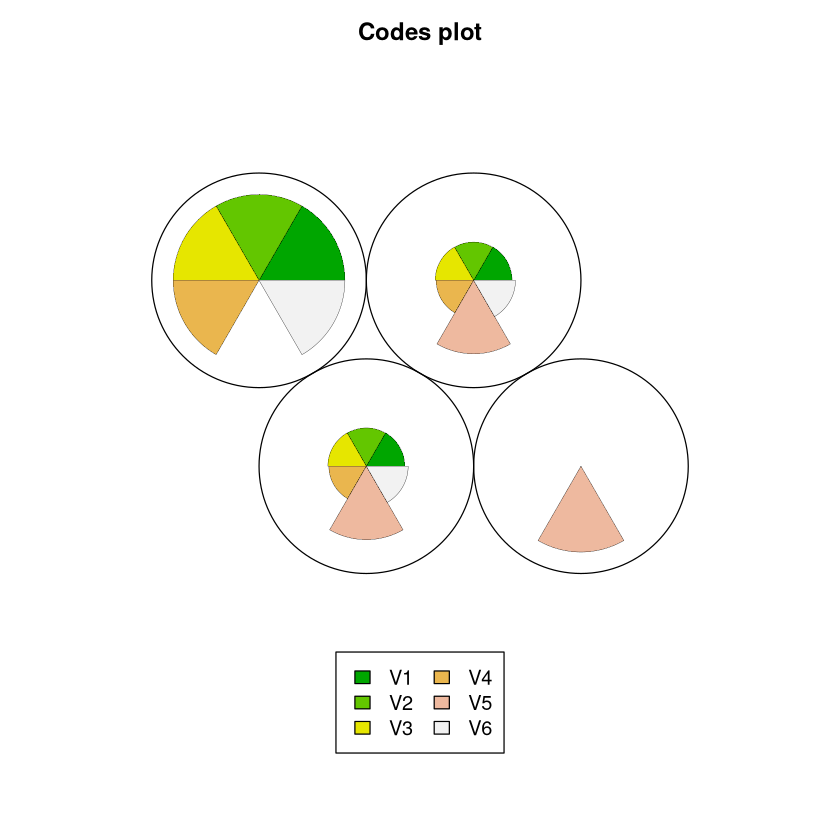

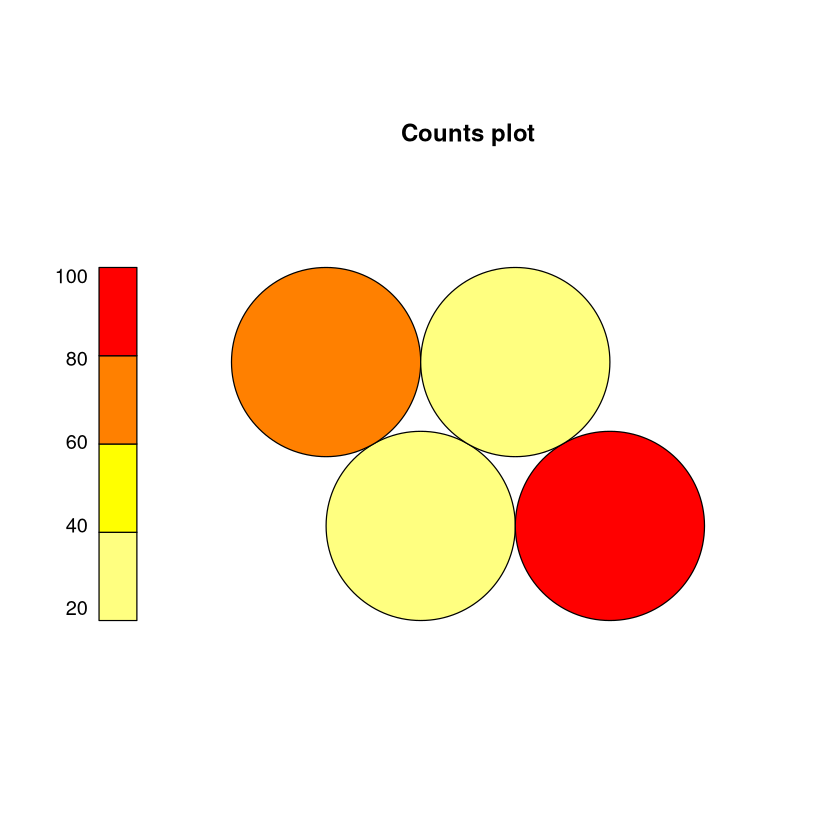

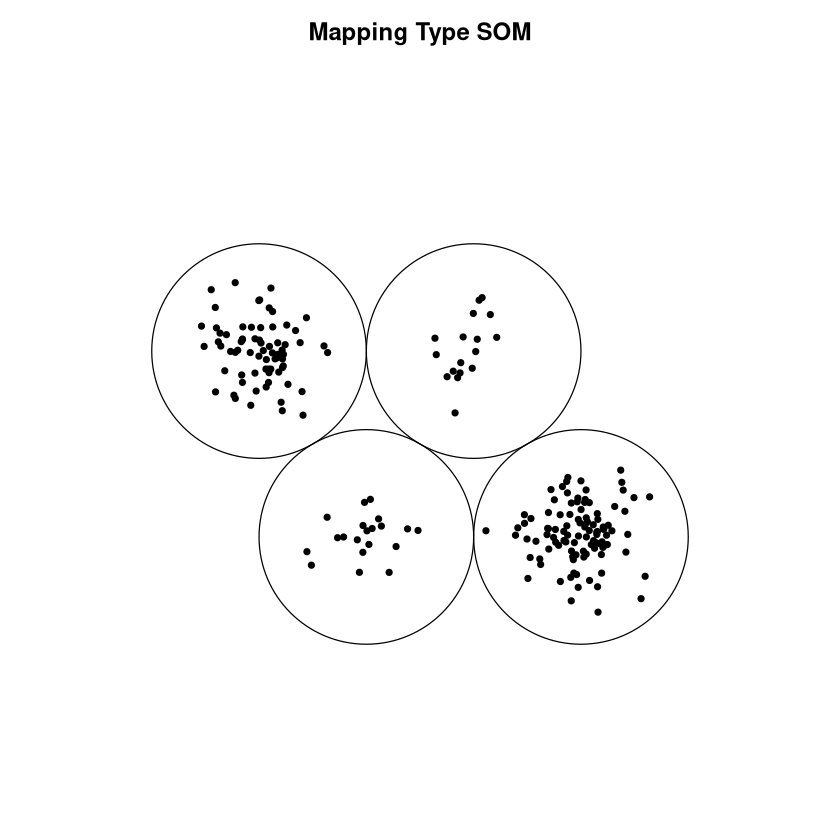

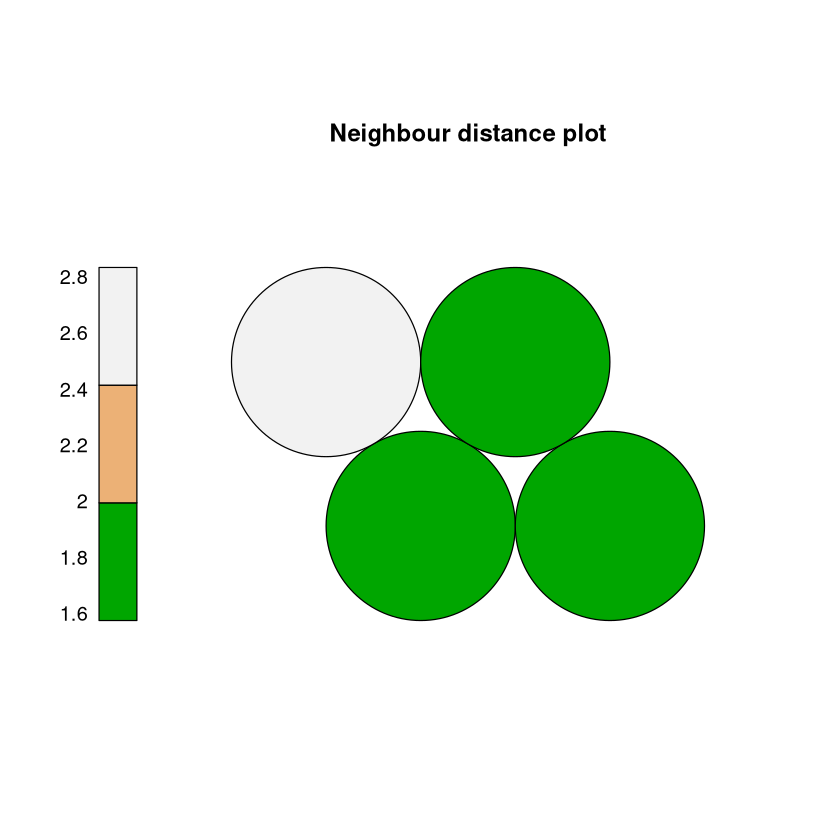

In [100]:
#create SOM grid
#sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
# si variamos rlen desde 50 
sommap <- som(scale(datos), 
    alpha = 0.05, 
    radius = c(2,1),
    grid = somgrid(2, 2, "hexagonal"))

plot(sommap,  codeRendering="segments")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)
plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

Si variamos el factor de aprendizaje (alpha) entre valores desde 0.01 a 0.05, los pesos de los nodos se actualizarán más rápidamente y de manera más pronunciada en respuesta a las observaciones durante el entrenamiento. Si lo disminuimos los pesos se actualizaran de forma las lenta y gradual. 
Cuando se indica un valor para radius como un vector, se ajusta el alcande del vecindario, p.e: c(2,1) indica que al comienzo el radio es mas grande (2) implica un vecindario mas grande de nodos que se actualizaran, a medida que avanza se reduce el alcance de influencia de los nodos vecinos. Podemos ver como en el grafico de distancias, hay nodos 3 en color verde, esto indica que esos tres nodos tienen una alta similitud entre sí en términos de las observaciones asignadas a ellos.
<hr>

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.

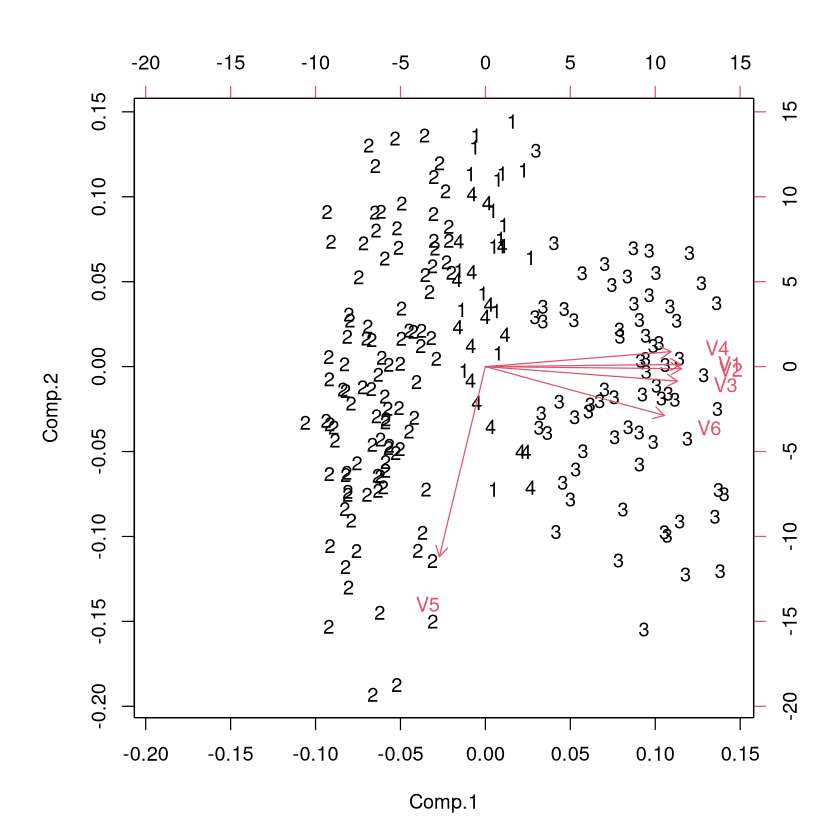

In [101]:
res <- princomp(datos, cor=TRUE)
res
cl <- sommap$unit.classif # similar a los otros metodos pero se trabaja con el id del dato
biplot(res, xlabs=cl)

#### **Ejercicio 2:**

a) Explique como funciona esta nueva visualización. Interprete y comente los resultados obtenidos.

b) Complete el Ejercicio 4 de la tarea anterior con el agrupamiento que genera el método som con K=3. Compare los resultados de la medida de calidad con los otros tres métodos de clustering. Concluya.

<hr>
<h4 style="color:orange"> Desarrollo ejercicio 2.a</h4>
La visualización muestra las variables originales del conjunto de datos como flechas en el espacio bidimensional. La dirección y la longitud de las flechas representan la contribución de cada variable al análisis de componentes principales. Con flechas más largas se denota una mayor influencia en la variabilidad del conjunto de datos. Las observaciones del conjunto de datos se muestran como puntos en el espacio bidimensional. Las observaciones se representan en relación con las variables, lo que permite analizar su posición relativa en el espacio de las variables.

En nuestro caso se puede apreciar que las variables V1,V2,V3,V4 Y V6 están correlacionadas debido a la proximidad de sus flechas, estas variables presentan similitudes en términos de su dirección y magnitud, además estas flechas estan situadas cercas de los datos del grupo 4, lo que significa una correlación de este grupo a las variables mencionadas. La variable V5 tiene menos correlacion con las otras y es mas independiente debido a la dirección de su flecha, presentando mas similitud con los grupos de datos 3 y 1.

<h4 style="color:orange"> Desarrollo ejercicio 2.b</h4>

In [104]:
if(!require('fossil')) {
  install.packages('fossil')
  library('fossil')
}

datos_semillas <-read.table("..//data//semillas.txt",dec=".")
datos_semillas <- as.data.frame(datos_semillas)

sommap_semillas1 <- som(scale(datos), 
    grid = somgrid(1, 3, "hexagonal"))


cls <- sommap_semillas1$unit.classif

rand.index(cls, datos_semillas$V7)
comp_principales <- princomp(datos, cor=TRUE)




[1] 0.9006152

rand.index: 0.900615174299385 <br><br>
Para utilizar K = 3, necesitamos establecer grid = somgrid(1, 3) para tener tres agrupamientos, el resultado de la agrupacion tiene similitud con dos metodos k-means y gmm, con el metodo jerarquico la diferencia en el resultado rand.index es mayor. De los 4 metodos estudiados podemos concluir que el que mejor resultados no esta entregando para el tipo de datos analizados es gmm seguido del metodo som y posteriormente k-means, no obstante las diferencias entre los dos primeros metodos es despreciable, por la cantidad de datos (diferencia en rand.index ~0.02).

<hr>

#### **Ejercicio 3:**

Considere el subconjunto de datos del archivo datosComunas.csv que ha estudiado en las tareas anteriores.

a) Realice el análisis de agrupamiento con SOM y discuta sus resultados 

b) Proponga una estrategia gráfica para representarlos.

<hr>
<h4 style = "color: orange"> Desarrollo ejercicio 3.a</h4>

Warning message in par(opar):
“argument 1 does not name a graphical parameter”


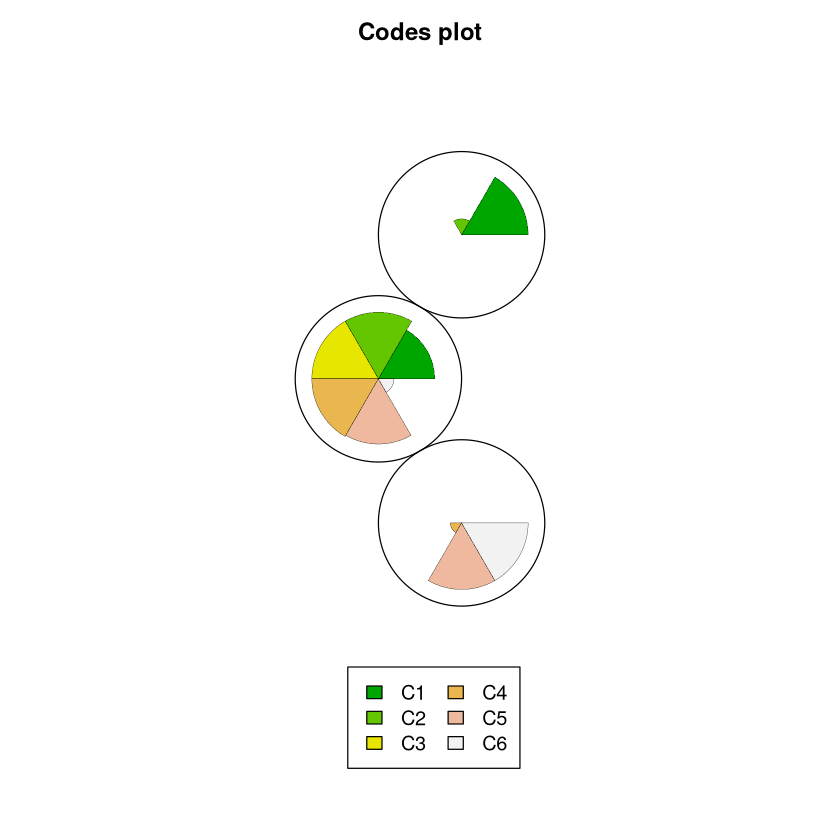

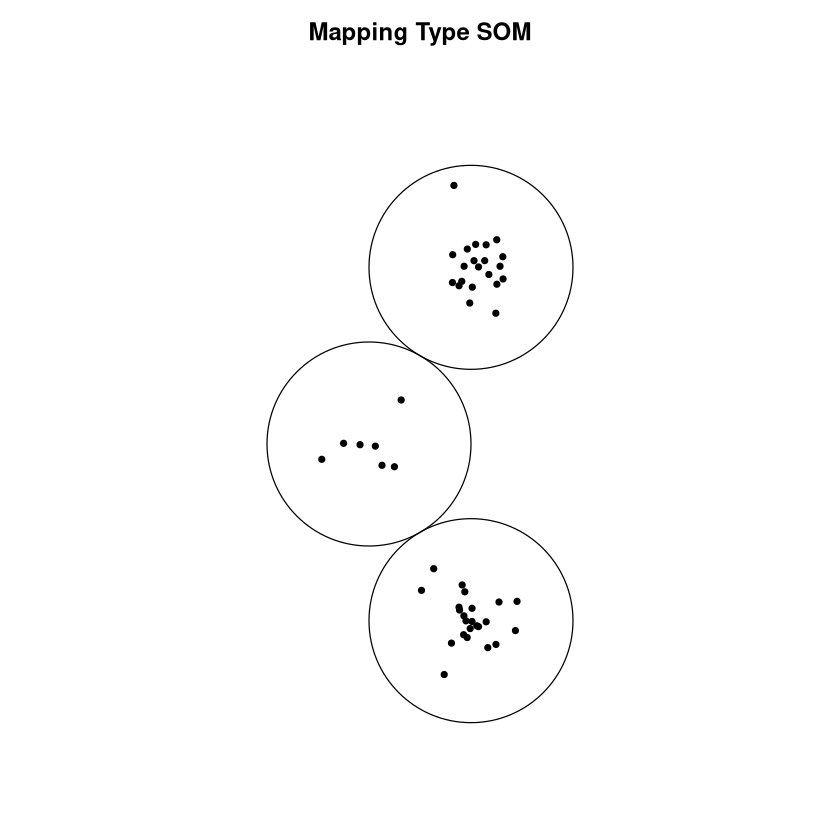

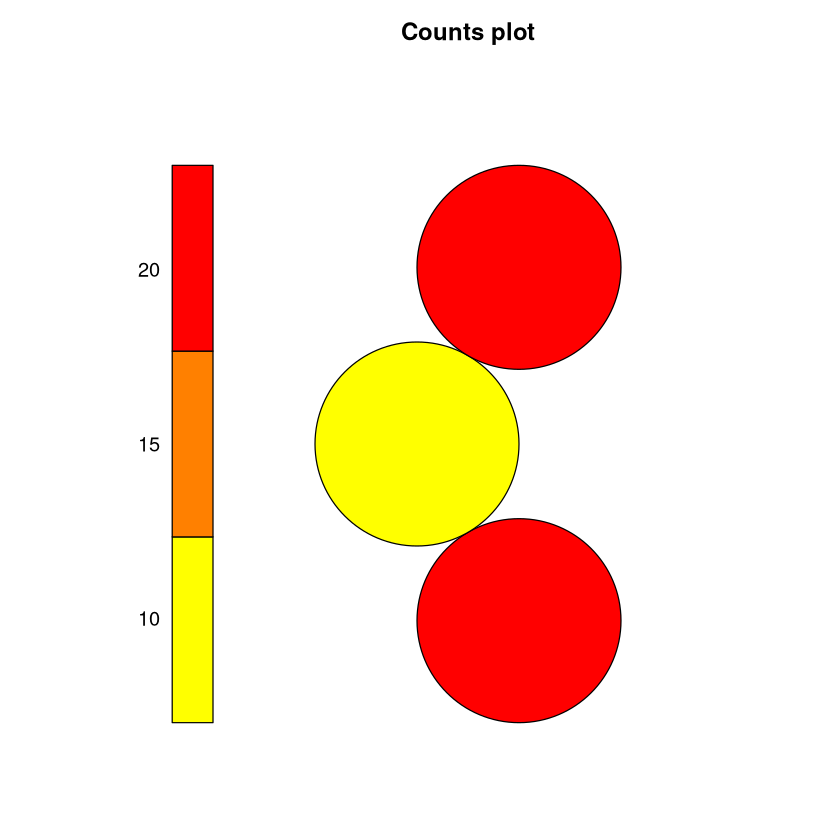

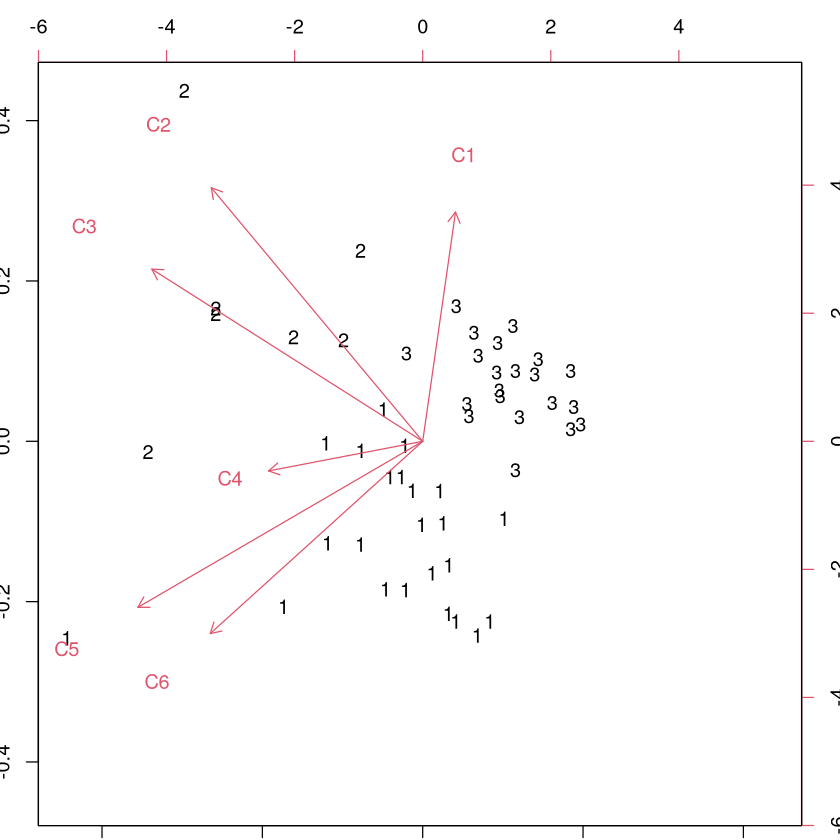

In [169]:
datos_comunas <- read.table("..//data//datosComunas.csv", sep=";", dec=",", header= TRUE)
datos_comunas <- datos_comunas[30:80, 16:21]

sommap_comunas <- som(scale(datos_comunas),   
    grid = somgrid(1, 3, "hexagonal"),
    keep.data = 'TRUE')

res_componentes <- princomp(datos_comunas, cor=TRUE)
clus <- sommap_comunas$unit.classif

plot(sommap_comunas)
plot(sommap_comunas, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(sommap_comunas, type = "counts", palette.name = colors, heatkey = TRUE)
biplot(res_componentes, xlabs=clus)

En k-means nuestra seleccion de comunas no 'funcionaba' adecuadamente, pero creemos que es mas por la seleccion de variables, por lo tanto decidimos seleccionar variables de un mismo 'tipo', (C1 a C6) que sean parte de un mismo grupo (Mejor calidad del medio) para realizar el analisis con som.

Utilizando las comunas de la 30 a la 80, podemos ver que C1 y C6 no estan relacionadas, es decir, la cantidad de kg de residuos per capita no se relaciona con la cantidad de vegetacion densa. C1 se relaciona con C2 (mayor medida) y C3 que es el consumo de energia electria per capita residencial y no residencial, quiere decir (probablmente) que, existen mas desechos cuando mayor es el consumo electrico. C4 y C5 tambien se relacionan, podria significar que hay mayor porcentaje de superficie cubierta con vegetacion cuando el aporte de energia domiciliario es mayor.

<h4 style = "color: orange"> Desarrollo ejercicio 3.b</h4>

<hr>
